# __*IRIS PREDICTION*__

## __IMPORT LIBRARIES__

In [ ]:
import pandas as pd 
import numpy as np
import pandas as pd   
import numpy as np       
import matplotlib.pyplot as plt  
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,balanced_accuracy_score,matthews_corrcoef
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier

## __EXPLORATORY DATA ANALYSIS__

In [ ]:
df = pd.read_csv('train.csv')
df.head()

### __SPLIT DATA__

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

In [ ]:
print("Descriptive statistics for numerical features:")
display(df[num_cols].describe())

### __MAIN NUMERIC EXPLORATION__

In [ ]:
df.tail()

In [ ]:
df.info()

In [ ]:
df.describe()  

In [ ]:
df.columns

In [ ]:
df.dtypes 

In [ ]:
df.isnull().sum()

WE CAN NOTICE THAT THERE ARE NO NULLS SO WE ARE SURE THAT WE CAN USE ALL SAMPLES

In [ ]:
df.duplicated().sum()

### __PAIRPLOT__

In [ ]:
sns.pairplot(df, hue='target', diag_kind='kde', corner=True)
plt.show()

### __COUNTPLOT__

Done to check imbalance

In [ ]:
sns.countplot(x='target', data=df)
plt.title('Class Distribution')
plt.show()

There probably is an imbalance on target variable 0

### __BOXPLOT__

In [ ]:
for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f'{col} distribution by class')
    plt.xlabel('Target class')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

### __HEATMAP__

In [ ]:
plt.figure(figsize=(10, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

## __MODELS__

In [ ]:
train_df = pd.read_csv('train.csv')

train_df.columns = train_df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

X = train_df.drop(columns=['target', 'id'])
y = train_df['target']

# NOTE: stratify is used to balance distributions
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [ ]:
print(X)

## __LOGISTIC REGRESSION__

Allowed gridsearch combinations for solvers and regularization methods (shows also support for multiclass settings):

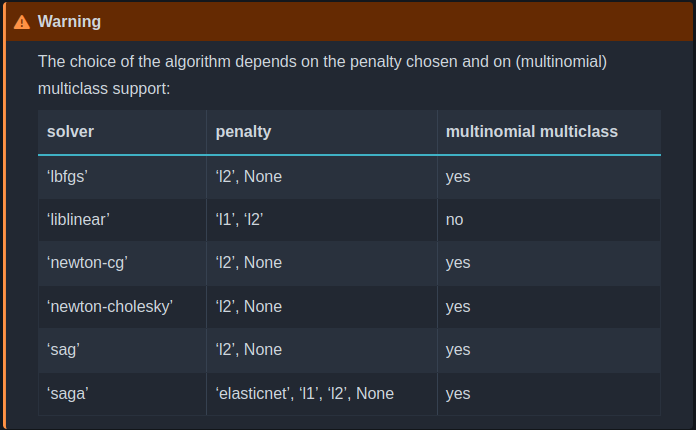

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    'penalty': ['l2', None],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['saga', 'newton-cg', 'sag', 'saga'],
    'max_iter': [50,100,200,400,700,1000,10000],
}

lr_model = LogisticRegression(random_state=42, verbose=0)

grid_search_lr = GridSearchCV(
    estimator=lr_model,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
)

grid_search_lr.fit(X, y)

best_lr = grid_search_lr.best_estimator_
print("Best parameters:", grid_search_lr.best_params_)
print("Best CV F1-macro:", grid_search_lr.best_score_)


# PCA visualization

# # Convert X, y to numpy arrays for PCA visualization
X_np = X.to_numpy()
y_np = y.to_numpy()

# PCA: reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_np)

# Create a 2D mesh grid in PCA space
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Map grid points back to original feature space
grid_pca = np.c_[xx.ravel(), yy.ravel()]
grid_original = pca.inverse_transform(grid_pca)

# Predict class for each grid point
Z = best_lr.predict(grid_original)
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set1')

# Overlay data points
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_np, edgecolor='k', s=50, cmap='Set1')

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Logistic Regression Decision Boundary (PCA projection)")
plt.show()


## __ALL METHODS__

In [ ]:
classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=200, random_state=42),
    "Logistic Regression": LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42),
    "Ridge Classifier": RidgeClassifier(),
    "LDA": LinearDiscriminantAnalysis(),
    "kNN": KNeighborsClassifier(n_neighbors=5),
    "GaussianNB": GaussianNB(),
    "SVC (OvR)": OneVsRestClassifier(SVC(kernel='rbf', probability=True)),
    "MLP": MLPClassifier(hidden_layer_sizes=(50,50), max_iter=1000, random_state=42)
}

In [ ]:
# NOTE: instantiate arrays where to keep the accuracy for better visualization later
results = []
results_5 = []
results_10 = []

# NOTE: Iterate over all the classifiers previously defined (for the moment not fine-tuned)
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_val_scaled)

    # NOTE: Get the different scores, general one which tends to overfit given the small dataset size and cross validated one more reliable.
    acc = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='macro')
    recall = recall_score(y_val, y_pred, average='macro')
    f1 = f1_score(y_val, y_pred, average='macro')
    balanced_acc = balanced_accuracy_score(y_val, y_pred)
   
    results.append({
            'Classifier': name,
            'Accuracy': acc,
            'Precision': precision,
            'Recall': recall,
            'F1-score': f1,
            'Balanced Accuracy': balanced_acc,
        })
    
   # Cross-validation (use Pipeline for scaling if necessary)
    pipe = Pipeline([('scaler', StandardScaler()), ('clf', clf)])
    scores_5 = cross_val_score(pipe, X, y, cv=5)
    scores_10 = cross_val_score(pipe, X, y, cv=10)
    
    results_5.append((name, np.mean(scores_5)))
    results_10.append((name, np.mean(scores_10)))

    print(f"--- {name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision (macro): {precision:.4f}")
    print(f"Recall (macro): {recall:.4f}")
    print(f"F1-score (macro): {f1:.4f}")
    print(f"Balanced Accuracy: {balanced_acc:.4f}")
    print(f"CV 5-fold Accuracy: {np.mean(scores_5):.4f}")
    print(f"CV 10-fold Accuracy: {np.mean(scores_10):.4f}\n")

In [ ]:
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
results_df_5 = pd.DataFrame(results_5, columns=['Classifier', 'CV_5_Accuracy']).sort_values(by='CV_5_Accuracy', ascending=False)
results_df_10 = pd.DataFrame(results_10, columns=['Classifier', 'CV_10_Accuracy']).sort_values(by='CV_10_Accuracy', ascending=False)

display(results_df)
display(results_df_5)
display(results_df_10)